# - Projet de Machine learning

---

### **TP1**


---

**Nom de l'auteur**: Gnalén SANGARE  
**Université/Organisation**: Ecole Nationale de la Statistique et de l'analyse Economique 
**Date**: 14 Novembre 2024  

---

### **Chargée du Cours**: Mme Mously DIAW 
  

---

![Logo](ENSAE-Dakar-logo.png)  <!-- Optionnel: Si tu veux ajouter un logo -->

---

### Résumé:
Le projet s'inscrit dans le cadre de l'application des méthodes de **Machine Learning** pour la prédiction de variables en utilisant des techniques de régression. Trois modèles ont été étudiés et comparés : **Ridge**, **Lasso** et **ElasticNet**. L'objectif principal était d'optimiser ces modèles en ajustant leurs hyperparamètres, notamment le paramètre **alpha** pour chaque modèle, afin d'améliorer leur performance en termes de précision.



# Importation des packages

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport as prf
from yellowbrick.regressor import ResidualsPlot


# Creation du repertoire de travail

In [3]:
# Return a new path pointing to the current working directory
HOME_DIR = Path.cwd()

# create a variable for data directory
DATA_DIR = Path(HOME_DIR, "data")

print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: c:\Users\Asus 10TH Gen\Desktop\Mon ise2\Machine learning\TP 
Data directory: c:\Users\Asus 10TH Gen\Desktop\Mon ise2\Machine learning\TP\data


In [4]:
# you must put the CSV file billets.csv in data directory, cf above cell
data = pd.read_csv(Path(DATA_DIR, "billets.csv"), sep=";")
data.shape  # data frame dimensions (nb rows, nb columns)

(1500, 7)

In [5]:
from sklearn import linear_model

import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

# Filtrage des données

In [6]:
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]

data_model.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


# Création des variables explicatives et cible

In [7]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

# Separation des données en jeu de test et train

In [8]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


In [10]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [11]:
X_train_std

array([[-1.07074174,  0.5462928 ,  0.54806196,  1.91843401,  0.05088625],
       [-0.40647448,  0.94600971,  1.77308884, -0.68168479, -1.8514336 ],
       [-1.20359519, -0.05328258, -0.06445149, -0.03165509,  0.54365585],
       ...,
       [ 2.01810103, -0.85271641, -0.83009329, -0.50834354,  0.37175948],
       [ 0.75599323,  1.97861174,  1.58933481,  0.9217218 , -1.95457142],
       [ 0.4238596 , -1.11919435,  1.06869838,  1.52841619, -0.54502117]])

In [12]:
X_train.mean()

diagonal        171.962383
height_left     104.035996
height_right    103.921045
margin_up         3.157305
length          112.675596
dtype: float64

In [13]:
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)
    
    # On récupère l'erreur de norme 2 sur le jeu de données train
    mse_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    mse_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    print(f"Model MSE: {round(mse_test, 5)}")
    return {"estimator": model, "mse_train": mse_train, "mse_test": mse_test}

# Ridge

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, max_error

In [15]:
# On crée un modèle de régression linéaire
ridge = linear_model.Ridge(alpha=1.)

# On entraîne ce modèle sur les données d'entrainement
ridge.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test
ridge_error = np.mean((ridge.predict(X_test) - y_test) ** 2)


# On obtient l'erreur quadratique ci-dessous
print(ridge_error)

0.21621362264250144


# Lasso

In [16]:
# Train and evaluate ridge regression
lasso_mse = train_model(model=linear_model.Lasso(fit_intercept=True, alpha=1.,),
                          x_train=X_train, y_train=y_train,
                          x_test=X_test, y_test=y_test)

lasso_mse 


Model MSE: 0.42698


{'estimator': Lasso(),
 'mse_train': 0.4460780868530273,
 'mse_test': 0.42698000593598173}

# Elastc Net

In [17]:
# Train and evaluate ridge regression
elastic_error = train_model(model=linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=.5),
                            x_train=X_train_std, y_train=y_train,
                            x_test=X_test, y_test=y_test)
elastic_error

Model MSE: 0.42698


C:\Users\Asus 10TH Gen\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


{'estimator': ElasticNet(),
 'mse_train': 0.4460780868530273,
 'mse_test': 0.42698000593598173}

# Elstic Net

In [18]:
import pandas as pd

# Supposons que le modèle ElasticNet a été ajusté précédemment sur le jeu de données d'entraînement
elastic_best_model = linear_model.ElasticNet(fit_intercept=True, alpha=1., l1_ratio=0.5)
elastic_best_model.fit(X_train_std, y_train)

# Extraction des coefficients
elastic_coefficients = pd.Series(elastic_best_model.coef_, index=X_train.columns)

# Tri des coefficients par ordre d'importance
print("Importance des variables (modèle ElasticNet) :")
print(round(elastic_coefficients.sort_values(ascending=False)), 6)


Importance des variables (modèle ElasticNet) :
diagonal       -0.0
height_left     0.0
height_right    0.0
margin_up       0.0
length         -0.0
dtype: float64 6


In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Définir la fonction d'entraînement et d'évaluation du modèle
def train_model(model, x_train, y_train, x_test, y_test):
    # Entraîner le modèle sur le jeu de données d'entraînement
    model.fit(x_train, y_train)
    
    # Prédictions sur les jeux de train et test
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calcul des erreurs et des scores
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    return {"v.predicte_train":y_train_pred,
            "v.predicte_test":y_test_pred,
        "estimator": model,
        "train_mse": train_mse,
        "test_mse": test_mse,
        "train_r2": train_r2,
        "test_r2": test_r2
    }

# Initialiser le modèle ElasticNet avec les hyperparamètres souhaités
elastic_model = ElasticNet(fit_intercept=True, alpha=1.0, l1_ratio=0.5)

# Appeler la fonction pour entraîner et évaluer le modèle
elastic_error = train_model(
    model=elastic_model,
    x_train=X_train_std, 
    y_train=y_train,
    x_test=X_test, 
    y_test=y_test
)

# Afficher les résultats de performance
print("Résultats de l'évaluation du modèle ElasticNet:")
print(f"Train MSE: {elastic_error['train_mse']}")
print(f"Test MSE: {elastic_error['test_mse']}")
print(f"Train R²: {elastic_error['train_r2']}")
print(f"Test R²: {elastic_error['test_r2']}")


Résultats de l'évaluation du modèle ElasticNet:
Train MSE: 0.4460780868530273
Test MSE: 0.42698000593598173
Train R²: 0.0
Test R²: -3.515245461338523e-05


C:\Users\Asus 10TH Gen\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


In [21]:
corr_matrix = X_train.corr()
print(corr_matrix)

corr_matrix2 = X_test.corr()
print(corr_matrix2)

              diagonal  height_left  height_right  margin_up    length
diagonal      1.000000     0.010229     -0.029736  -0.050775  0.077258
height_left   0.010229     1.000000      0.234991   0.276457 -0.328110
height_right -0.029736     0.234991      1.000000   0.295909 -0.386754
margin_up    -0.050775     0.276457      0.295909   1.000000 -0.534437
length        0.077258    -0.328110     -0.386754  -0.534437  1.000000
              diagonal  height_left  height_right  margin_up    length
diagonal      1.000000     0.035154      0.004217  -0.079225  0.153130
height_left   0.035154     1.000000      0.235888   0.165936 -0.282413
height_right  0.004217     0.235888      1.000000   0.333605 -0.446241
margin_up    -0.079225     0.165936      0.333605   1.000000 -0.491210
length        0.153130    -0.282413     -0.446241  -0.491210  1.000000


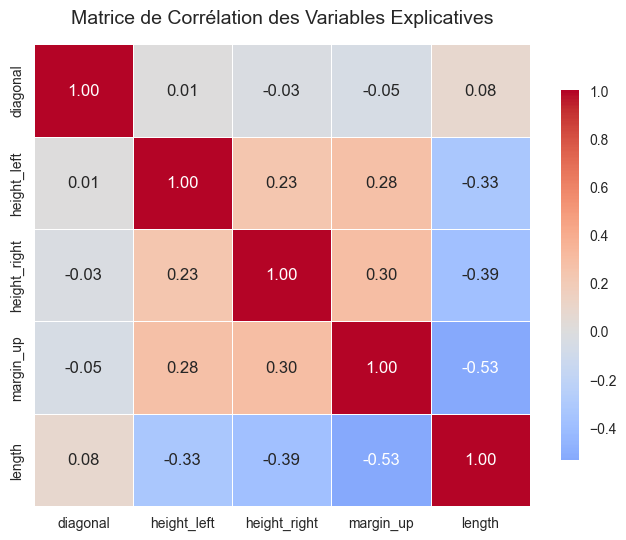

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir la taille de la figure
plt.figure(figsize=(8, 6))

# Créer une carte de chaleur de la matrice de corrélation avec annotations et mise en forme
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})

# Ajouter un titre
plt.title("Matrice de Corrélation des Variables Explicatives", fontsize=14, pad=15)

# Afficher la figure
plt.show()


In [23]:
X_train

,diagonal,height_left,height_right,margin_up,length
1243,171.64,104.20,104.10,3.60,112.72
1348,171.84,104.32,104.50,3.00,111.06
137,171.60,104.02,103.90,3.15,113.15
607,171.91,104.17,103.62,2.89,112.73
1198,172.05,104.20,104.11,3.37,111.18
...,...,...,...,...,...
1161,171.92,104.29,104.27,3.13,111.37
1328,172.10,104.22,103.99,3.24,111.94
884,172.57,103.78,103.65,3.04,113.00
1496,172.19,104.63,104.44,3.37,110.97


# Conclusion de l'Exercice1 : Analyse des Variables Explicatives avec ElasticNet

Dans cet exercice, l’utilisation du modèle ElasticNet a permis d’examiner la pertinence des variables explicatives `diagonal`, `height_left`, `height_right`, `margin_up`, et `length` . Cependant, l’analyse a montré que toutes les variables ont été pénalisées au point d’avoir des coefficients nuls, ce qui suggère une faible importance explicative de chacune individuellement pour le modèle actuel.

### Principales Conclusions

1. **Impact de la Régularisation** :  
   Les valeurs nulles pour tous les coefficients dans le modèle ElasticNet indiquent que le niveau de régularisation sélectionné (défini par les paramètres `alpha` et `l1_ratio`) est très restrictif. Cela a conduit à éliminer toute influence directe des variables explicatives. Cette situation reflète une possible sur-pénalisation, ce qui est courant lorsque les relations entre les variables et la cible sont faibles ou lorsque les valeurs de régularisation sont trop élevées.

2. **Corrélation entre Variables Explicatives** :  
   La matrice de corrélation montre des relations faibles à modérées entre certaines variables, sans indiquer de forte multicolinéarité. Toutefois, ces corrélations n’ont pas suffi à rendre les variables significatives pour le modèle, ce qui suggère que leur contribution conjointe à la prédiction reste limitée dans le cadre du modèle ElasticNet actuel.

3. **Performance du Modèle** :  
   Avec un **MSE (Mean Squared Error)** de 0.446 pour le jeu d’entraînement et de 0.427 pour le jeu de test, le modèle montre une performance relativement stable entre les deux ensembles. Cela peut indiquer que le modèle est bien généralisé, mais le manque de variables explicatives significatives limite son interprétabilité et son potentiel prédictif.

### Perspectives et Recommandations

Pour améliorer la compréhension de ce modèle et obtenir une importance des variables plus significative, plusieurs options peuvent être envisagées :

- **Réduire le niveau de régularisation** : Tester différentes valeurs pour `alpha` et `l1_ratio` afin de mieux équilibrer la complexité et la généralisation du modèle.
- **Explorer des interactions ou transformations de variables** : Des transformations non linéaires, comme les carrés ou les produits croisés des variables explicatives, pourraient aider à capturer des relations qui ne sont pas linéaires.
- **Essayer d'autres modèles** : D’autres algorithmes, comme les forêts aléatoires ou le boosting, peuvent capturer des interactions complexes entre les variables et fournir une autre perspective sur leur importance explicative.

En conclusion, bien que le modèle ElasticNet actuel ne montre pas d’importance significative des variables, des ajustements de régularisation et une exploration de nouvelles caractéristiques pourraient améliorer la pertinence des variables explicatives pour les futures analyses.


# Exercice 2

# Choix des valeurs de alpha pour Ridge, Lasso et ElasticNet

Dans les modèles de régression Ridge, Lasso, et ElasticNet, le paramètre **alpha** est un hyperparamètre clé qui contrôle la régularisation. Il agit comme un facteur de pondération de la pénalité appliquée aux coefficients du modèle, afin d'éviter le surapprentissage.

- **Grand alpha** : forte régularisation, coefficients proches de zéro.
- **Petit alpha** : faible régularisation, meilleure adaptation aux données.

## Comment choisir la valeur de alpha :

### 1. Recherche sur grille (Grid Search)
C'est une méthode qui consiste à tester plusieurs valeurs d'alpha en utilisant une **validation croisée**. Cela permet de trouver la meilleure valeur d'alpha qui minimise l'erreur de validation.  
En scikit-learn, on peut utiliser `GridSearchCV`.

### 2. Validation croisée (Cross-validation)
Après avoir sélectionné un ensemble de candidats pour alpha, on peut évaluer chaque valeur d'alpha sur différentes sous-parties des données d’entraînement. Cela permet de choisir l'alpha qui minimise l'erreur de validation (ex. MSE).

### 3. Critères automatiques
Certains modèles, comme **Lasso**, utilisent des critères automatiques comme le **BIC** (Bayesian Information Criterion) ou l'**AIC** (Akaike Information Criterion) pour sélectionner la meilleure valeur d'alpha en fonction de l'erreur du modèle.


In [66]:
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn import set_config

set_config(display="diagram", print_changed_only=True)

# Modèle Ridge
## Création du pipeline , recherche des hyperparamètres et visualisation des graphes

In [24]:
X_train

,diagonal,height_left,height_right,margin_up,length
1243,171.64,104.20,104.10,3.60,112.72
1348,171.84,104.32,104.50,3.00,111.06
137,171.60,104.02,103.90,3.15,113.15
607,171.91,104.17,103.62,2.89,112.73
1198,172.05,104.20,104.11,3.37,111.18
...,...,...,...,...,...
1161,171.92,104.29,104.27,3.13,111.37
1328,172.10,104.22,103.99,3.24,111.94
884,172.57,103.78,103.65,3.04,113.00
1496,172.19,104.63,104.44,3.37,110.97


Meilleur alpha pour Ridge : 10.0
Ridge - Train - MSE: 0.236, RMSE: 0.486, R²: 0.470
Ridge - Test - MSE: 0.216, RMSE: 0.465, R²: 0.493


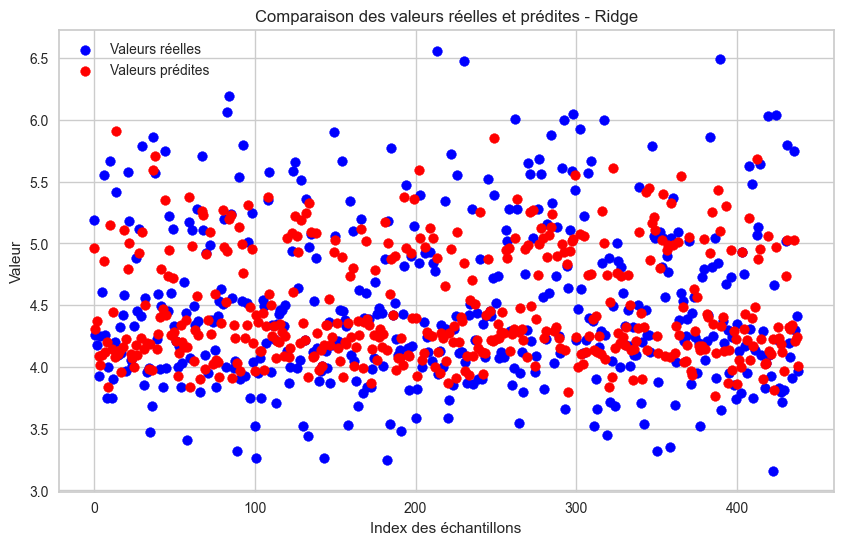

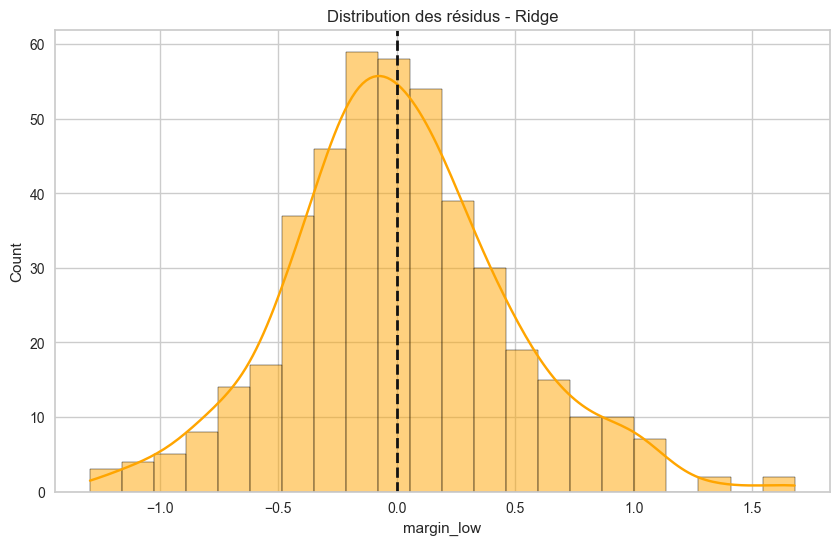

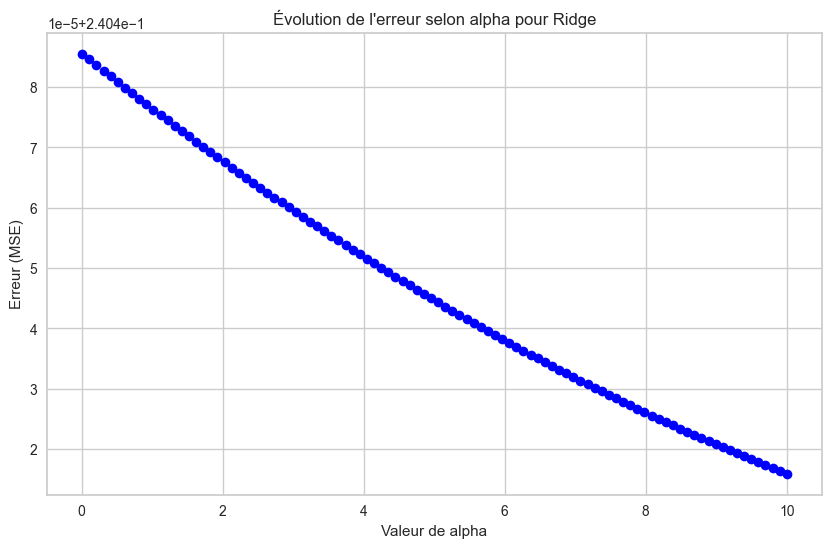

In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Préparation des données (remplacez X et y par vos données)
# X, y sont vos variables d'entrée et de sortie respectivement
# Par exemple :
# X = df.drop(columns='target')
# y = df['target']


# 2. Fonction pour optimiser Ridge et trouver le meilleur alpha
def optimize_ridge(X_train, y_train):
    # Création du modèle Ridge
    ridge = Ridge()

    # Création du pipeline avec un standard scaler pour la mise à l'échelle des données
    pipeline_ridge = Pipeline([
        ('scaler', StandardScaler()),  # Normalisation des données
        ('ridge', ridge)
    ])

    # Plage de valeurs alpha à tester
    alphas = np.linspace(0.01, 10, 100)  # Alpha entre 0.01 et 10
    
    # GridSearchCV pour optimiser alpha
    grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid={'ridge__alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
    grid_search_ridge.fit(X_train, y_train)

    # Retourner le meilleur modèle et le meilleur alpha
    best_ridge = grid_search_ridge.best_estimator_
    best_alpha = grid_search_ridge.best_params_['ridge__alpha']

    return best_ridge, best_alpha, grid_search_ridge

# 3. Fonction pour évaluer le modèle
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Prédictions sur les données d'entraînement et de test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcul des erreurs et des métriques
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test, y_test_pred

# 4. Fonction pour comparer les valeurs réelles et prédites
def plot_pred_vs_true(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_true)), y_true, color='blue', label='Valeurs réelles')
    plt.scatter(range(len(y_true)), y_pred, color='red', label='Valeurs prédites')
    plt.legend()
    plt.title(f"Comparaison des valeurs réelles et prédites - {model_name}")
    plt.xlabel('Index des échantillons')
    plt.ylabel('Valeur')
    plt.show()

# 5. Fonction pour visualiser la distribution des résidus
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred

    
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='orange')
    plt.axvline(x=0, color='k', linestyle='--', lw=2)
    plt.title(f"Distribution des résidus - {model_name}")
    plt.show()

# 6. Fonction pour afficher l'erreur en fonction de alpha
def plot_error_vs_alpha(grid_search):
    # Extraire les erreurs pour chaque alpha testé
    mean_errors = -grid_search.cv_results_['mean_test_score']  # Erreurs négatives (car GridSearch utilise neg_mean_squared_error)
    alphas = grid_search.param_grid['ridge__alpha']

    # Tracer l'évolution de l'erreur selon alpha
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mean_errors, color='blue', marker='o', linestyle='--')
    plt.xlabel('Valeur de alpha')
    plt.ylabel('Erreur (MSE)')
    plt.title('Évolution de l\'erreur selon alpha pour Ridge')
    plt.grid(True)
    plt.show()

# 7. Exécution du modèle Ridge, évaluation et visualisation
# Optimisation du modèle Ridge
best_ridge, best_alpha, grid_search_ridge = optimize_ridge(X_train, y_train)

# Affichage du meilleur alpha
print(f"Meilleur alpha pour Ridge : {best_alpha}")

# Évaluation du modèle Ridge
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test, y_test_pred = evaluate_model(best_ridge, X_train, X_test, y_train, y_test)

# Affichage des métriques
print(f"Ridge - Train - MSE: {mse_train:.3f}, RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
print(f"Ridge - Test - MSE: {mse_test:.3f}, RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

# Visualisation : Valeurs réelles vs prédites
plot_pred_vs_true(y_test, y_test_pred, "Ridge")

# Visualisation : Distribution des résidus
plot_residuals(y_test, y_test_pred, "Ridge")

# Visualisation : Erreur en fonction de alpha
plot_error_vs_alpha(grid_search_ridge)
mse_ridge=mse_test
r2_ridge=r2_test

# Optimisation de Lasso

Meilleur alpha pour Lasso : 0.01
Lasso - Train - MSE: 0.237, RMSE: 0.486, R²: 0.470
Lasso - Test - MSE: 0.217, RMSE: 0.466, R²: 0.492


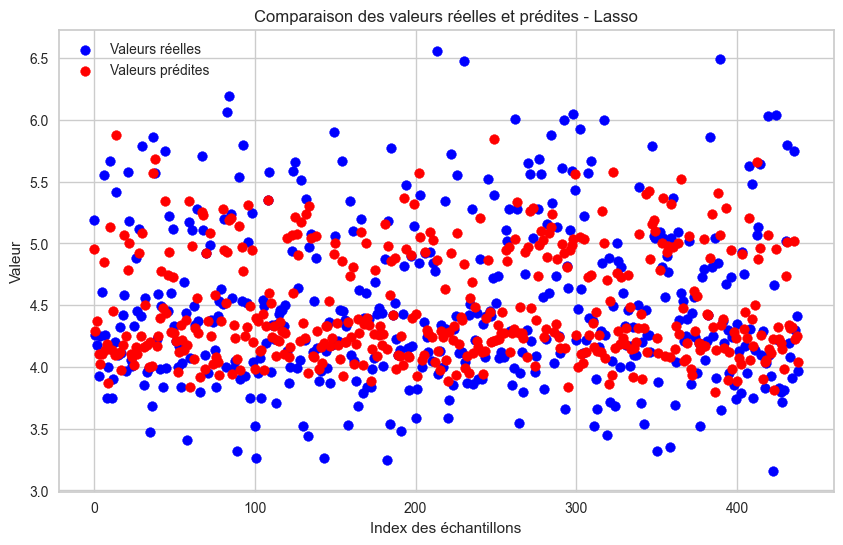

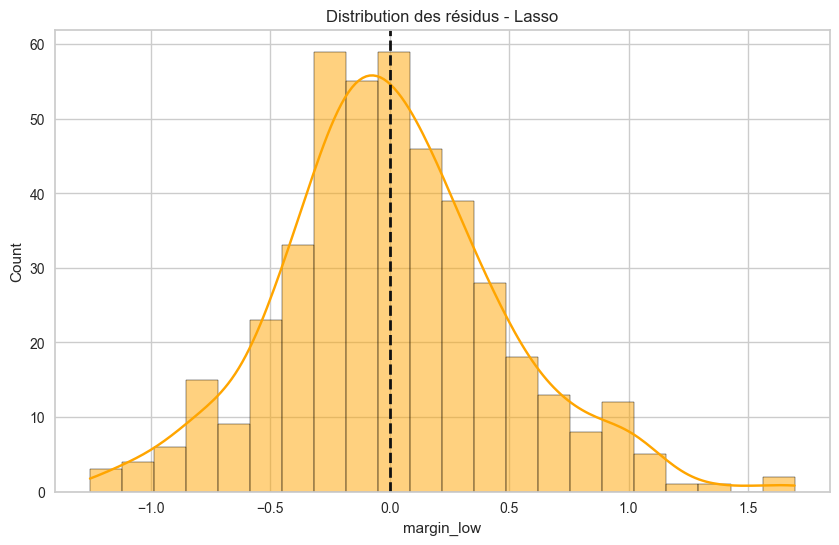

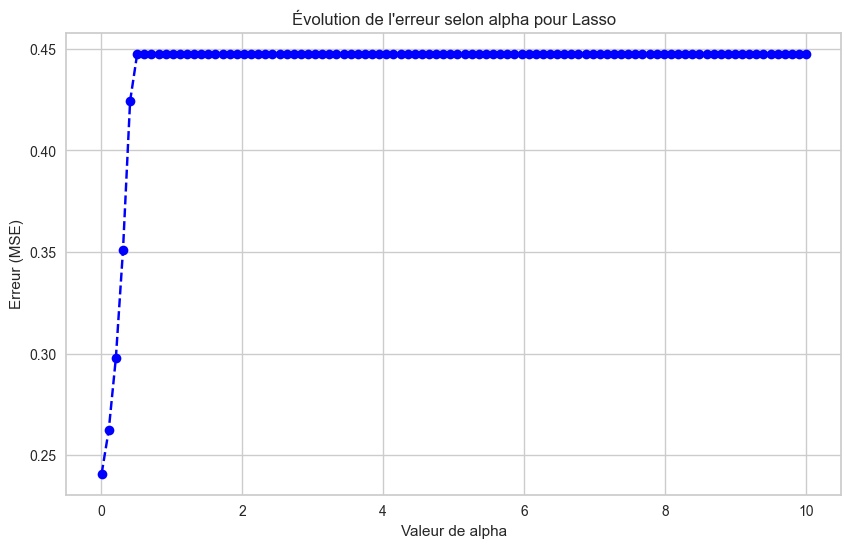

In [37]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Préparation des données (remplacez X et y par vos données)
# X, y sont vos variables d'entrée et de sortie respectivement
# Par exemple :
# X = df.drop(columns='target')
# y = df['target']


# 2. Fonction pour optimiser Lasso et trouver le meilleur alpha
def optimize_lasso(X_train, y_train):
    # Création du modèle Lasso
    lasso = Lasso()

    # Création du pipeline avec un standard scaler pour la mise à l'échelle des données
    pipeline_lasso = Pipeline([
        ('scaler', StandardScaler()),  # Normalisation des données
        ('lasso', lasso)
    ])

    # Plage de valeurs alpha à tester
    alphas = np.linspace(0.01, 10, 100)  # Alpha entre 0.01 et 10
    
    # GridSearchCV pour optimiser alpha
    grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid={'lasso__alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
    grid_search_lasso.fit(X_train, y_train)

    # Retourner le meilleur modèle et le meilleur alpha
    best_lasso = grid_search_lasso.best_estimator_
    best_alpha = grid_search_lasso.best_params_['lasso__alpha']

    return best_lasso, best_alpha, grid_search_lasso

# 3. Fonction pour évaluer le modèle
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Prédictions sur les données d'entraînement et de test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcul des erreurs et des métriques
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)

    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)

    return mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test, y_test_pred

# 4. Fonction pour comparer les valeurs réelles et prédites
def plot_pred_vs_true(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_true)), y_true, color='blue', label='Valeurs réelles')
    plt.scatter(range(len(y_true)), y_pred, color='red', label='Valeurs prédites')
    plt.legend()
    plt.title(f"Comparaison des valeurs réelles et prédites - {model_name}")
    plt.xlabel('Index des échantillons')
    plt.ylabel('Valeur')
    plt.show()

# 5. Fonction pour visualiser la distribution des résidus
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='orange')
    plt.axvline(x=0, color='k', linestyle='--', lw=2)
    plt.title(f"Distribution des résidus - {model_name}")
    plt.show()

# 6. Fonction pour afficher l'erreur en fonction de alpha
def plot_error_vs_alpha(grid_search):
    # Extraire les erreurs pour chaque alpha testé
    mean_errors = -grid_search.cv_results_['mean_test_score']  # Erreurs négatives (car GridSearch utilise neg_mean_squared_error)
    alphas = grid_search.param_grid['lasso__alpha']  # Changer ici pour lasso__alpha

    # Tracer l'évolution de l'erreur selon alpha
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mean_errors, color='blue', marker='o', linestyle='--')
    plt.xlabel('Valeur de alpha')
    plt.ylabel('Erreur (MSE)')
    plt.title('Évolution de l\'erreur selon alpha pour Lasso')
    plt.grid(True)
    plt.show()

# 7. Exécution du modèle Lasso, évaluation et visualisation
# Optimisation du modèle Lasso
best_lasso, best_alpha, grid_search_lasso = optimize_lasso(X_train, y_train)

# Affichage du meilleur alpha
print(f"Meilleur alpha pour Lasso : {best_alpha}")

# Évaluation du modèle Lasso
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test, y_test_pred_lasso = evaluate_model(best_lasso, X_train, X_test, y_train, y_test)

# Affichage des métriques
print(f"Lasso - Train - MSE: {mse_train:.3f}, RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
print(f"Lasso - Test - MSE: {mse_test:.3f}, RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

# Visualisation : Valeurs réelles vs prédites
plot_pred_vs_true(y_test, y_test_pred_lasso, "Lasso")

# Visualisation : Distribution des résidus
plot_residuals(y_test, y_test_pred_lasso, "Lasso")

# Visualisation : Erreur en fonction de alpha pour Lasso
plot_error_vs_alpha(grid_search_lasso)
mse_lasso=mse_test
r2_lasso=r2_test

# Optimisation de ElasticNet

Meilleur alpha pour ElasticNet : 0.01
Meilleur l1_ratio pour ElasticNet : 0.1
ElasticNet - Train - MSE: 0.236, RMSE: 0.486, R²: 0.470
ElasticNet - Test - MSE: 0.216, RMSE: 0.465, R²: 0.493


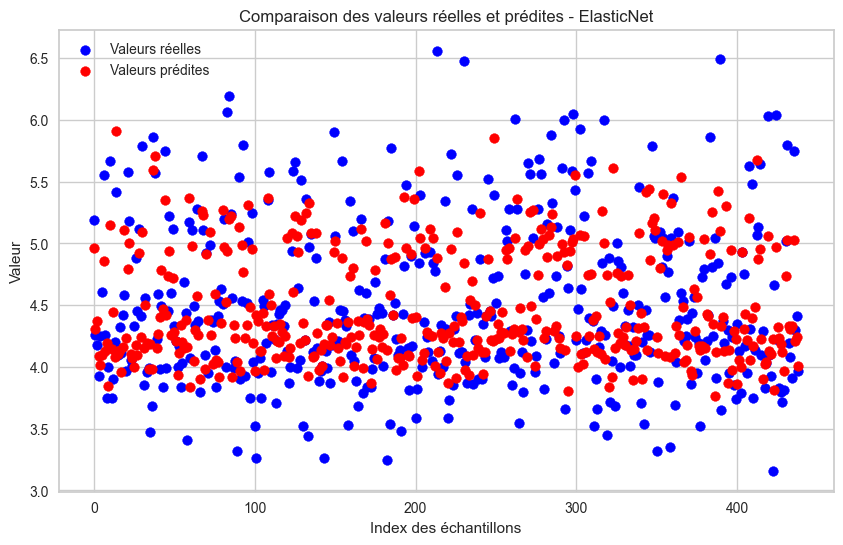

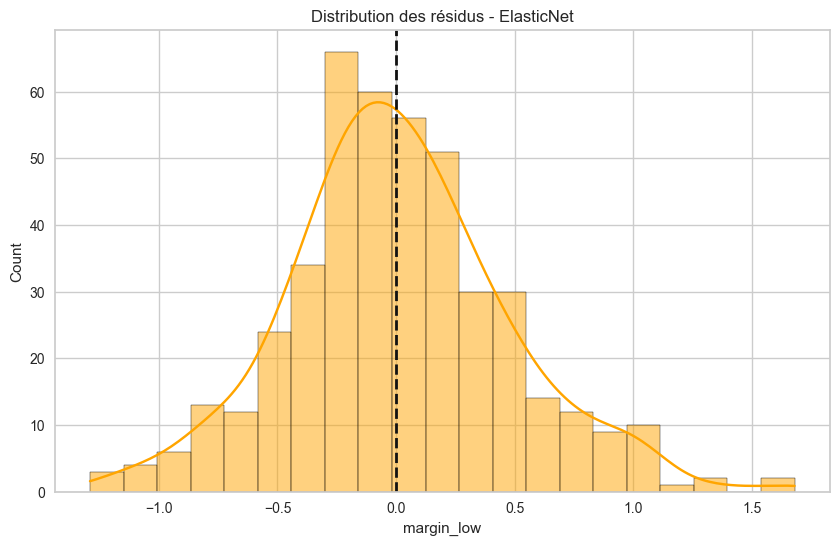

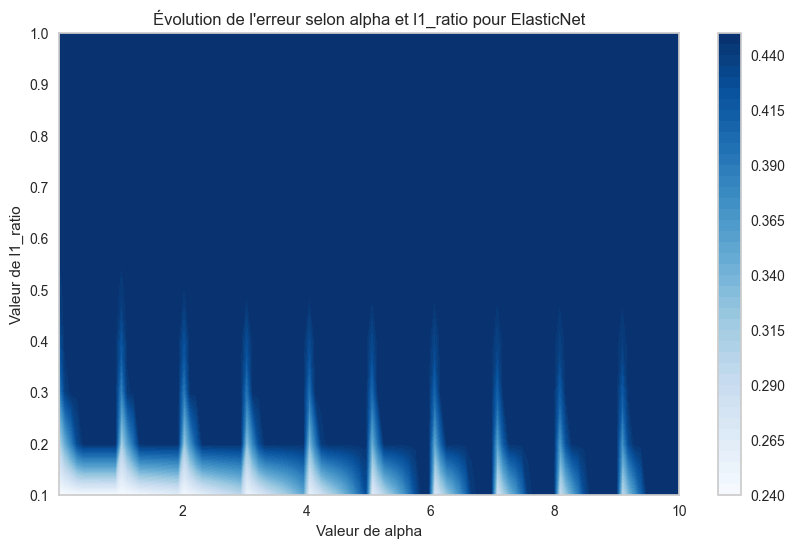

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# 1. Fonction pour optimiser ElasticNet et trouver le meilleur alpha et l1_ratio
def optimize_elasticnet(X_train, y_train):
    # Création du modèle ElasticNet
    elasticnet = ElasticNet()

    # Création du pipeline avec un standard scaler pour la mise à l'échelle des données
    pipeline_en = Pipeline([
        ('scaler', StandardScaler()),  # Normalisation des données
        ('elasticnet', elasticnet)
    ])

    # Plage de valeurs alpha et l1_ratio à tester
    alphas = np.linspace(0.01, 10, 100)  # Alpha entre 0.01 et 10
    l1_ratios = np.linspace(0.1, 1, 10)  # L1_ratio entre 0.1 et 1

    # GridSearchCV pour optimiser alpha et l1_ratio
    param_grid = {
        'elasticnet__alpha': alphas,
        'elasticnet__l1_ratio': l1_ratios
    }
    
    grid_search_en = GridSearchCV(pipeline_en, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search_en.fit(X_train, y_train)

    # Retourner le meilleur modèle, le meilleur alpha et le meilleur l1_ratio
    best_en = grid_search_en.best_estimator_
    best_alpha = grid_search_en.best_params_['elasticnet__alpha']
    best_l1_ratio = grid_search_en.best_params_['elasticnet__l1_ratio']

    return best_en, best_alpha, best_l1_ratio, grid_search_en

# 2. Exécution du modèle ElasticNet, évaluation et visualisation
# Optimisation du modèle ElasticNet
best_en, best_alpha, best_l1_ratio, grid_search_en = optimize_elasticnet(X_train, y_train)

# Affichage du meilleur alpha et l1_ratio
print(f"Meilleur alpha pour ElasticNet : {best_alpha}")
print(f"Meilleur l1_ratio pour ElasticNet : {best_l1_ratio}")

# Évaluation du modèle ElasticNet
mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test, y_test_pred_en = evaluate_model(best_en, X_train, X_test, y_train, y_test)

# Affichage des métriques
print(f"ElasticNet - Train - MSE: {mse_train:.3f}, RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
print(f"ElasticNet - Test - MSE: {mse_test:.3f}, RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

# Visualisation : Valeurs réelles vs prédites
plot_pred_vs_true(y_test, y_test_pred_en, "ElasticNet")

# Visualisation : Distribution des résidus
plot_residuals(y_test, y_test_pred_en, "ElasticNet")

# Visualisation : Erreur en fonction de alpha et l1_ratio pour ElasticNet
def plot_error_vs_alpha_l1_ratio(grid_search):
    # Extraire les erreurs pour chaque combinaison de alpha et l1_ratio
    mean_errors = -grid_search.cv_results_['mean_test_score']  # Erreurs négatives (car GridSearch utilise neg_mean_squared_error)
    alphas = grid_search.param_grid['elasticnet__alpha']
    l1_ratios = grid_search.param_grid['elasticnet__l1_ratio']

    # Tracer l'évolution de l'erreur selon alpha et l1_ratio
    plt.figure(figsize=(10, 6))
    alpha_grid, l1_ratio_grid = np.meshgrid(alphas, l1_ratios)
    mean_errors_grid = mean_errors.reshape(len(l1_ratios), len(alphas))

    # Affichage du graphique en 2D
    cp = plt.contourf(alpha_grid, l1_ratio_grid, mean_errors_grid, 50, cmap='Blues')
    plt.colorbar(cp)
    plt.xlabel('Valeur de alpha')
    plt.ylabel('Valeur de l1_ratio')
    plt.title('Évolution de l\'erreur selon alpha et l1_ratio pour ElasticNet')
    plt.show()

# Visualisation : Erreur en fonction de alpha et l1_ratio pour ElasticNet
plot_error_vs_alpha_l1_ratio(grid_search_en)
mse_en=mse_test
r2_en=r2_test

### Analyse des résultats

Tous les modèles (Ridge, Lasso, ElasticNet) présentent des performances similaires avec des valeurs proches de **MSE** et **RMSE** tant sur les données d'entraînement que sur celles de test.

Le **R²** est relativement faible (autour de 0.47 pour l'entraînement et de 0.49 pour le test), ce qui suggère que les modèles ne capturent pas bien la variance des données.

L'optimisation des paramètres (alpha pour Ridge, Lasso, et ElasticNet) semble avoir un effet sur les erreurs, mais les différences entre les modèles sont minimes.


# Étude de l'Importance des Variables dans les Modèles Ridge, Lasso et ElasticNet


## Ridge

       Variable  Coefficient
2  height_right     0.085368
3     margin_up     0.068031
1   height_left     0.053496
0      diagonal    -0.026462
4        length    -0.348845


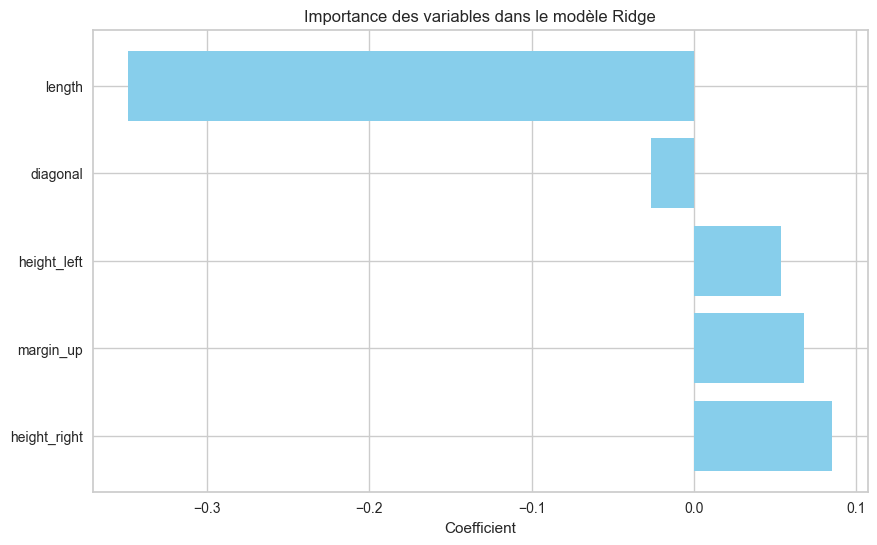

In [51]:
# Importance des variables pour Ridge
ridge_coefficients = best_ridge.named_steps['ridge'].coef_

# Créer un DataFrame pour les coefficients
import pandas as pd
coefficients_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': ridge_coefficients
})

# Trier par ordre décroissant des coefficients
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Affichage des coefficients
print(coefficients_df)

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Variable'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Importance des variables dans le modèle Ridge')
plt.show()


## Lasso

       Variable  Coefficient
2  height_right     0.079145
3     margin_up     0.061794
1   height_left     0.046387
0      diagonal    -0.016979
4        length    -0.351057


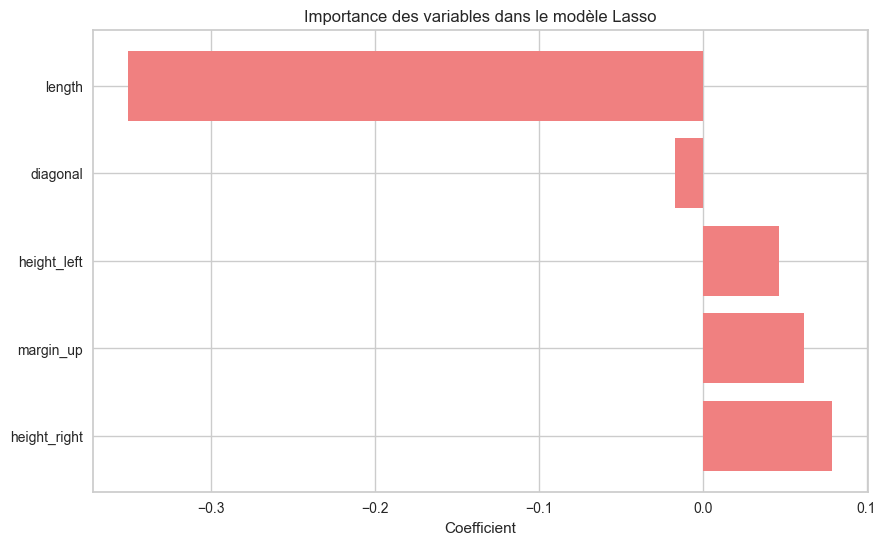

In [52]:
# Importance des variables pour Lasso
lasso_coefficients = best_lasso.named_steps['lasso'].coef_

# Créer un DataFrame pour les coefficients
coefficients_df_lasso = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': lasso_coefficients
})

# Trier par ordre décroissant des coefficients
coefficients_df_lasso = coefficients_df_lasso.sort_values(by='Coefficient', ascending=False)

# Affichage des coefficients
print(coefficients_df_lasso)

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df_lasso['Variable'], coefficients_df_lasso['Coefficient'], color='lightcoral')
plt.xlabel('Coefficient')
plt.title('Importance des variables dans le modèle Lasso')
plt.show()


       Variable  Coefficient
2  height_right     0.084761
3     margin_up     0.067437
1   height_left     0.052807
0      diagonal    -0.025524
4        length    -0.348963


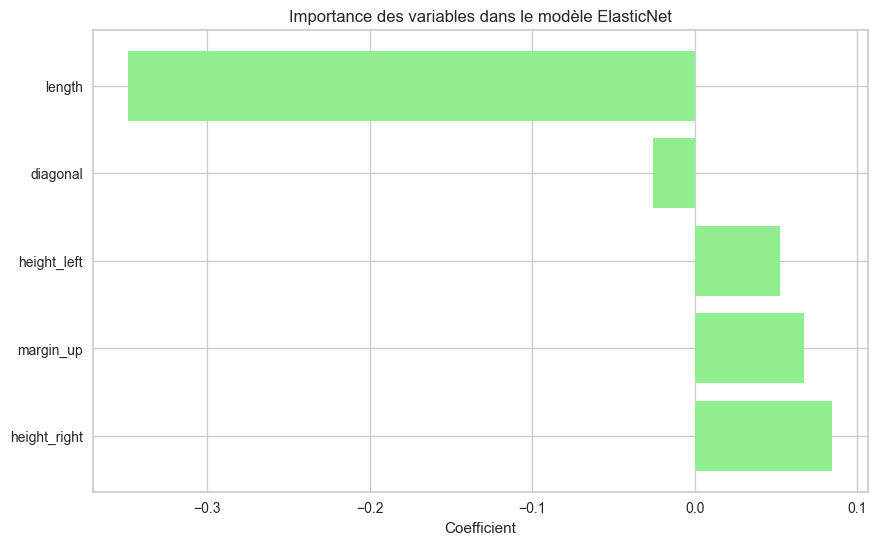

In [54]:
# Importance des variables pour ElasticNet
elasticnet_coefficients = best_en.named_steps['elasticnet'].coef_

# Créer un DataFrame pour les coefficients
coefficients_df_elasticnet = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': elasticnet_coefficients
})

# Trier par ordre décroissant des coefficients
coefficients_df_elasticnet = coefficients_df_elasticnet.sort_values(by='Coefficient', ascending=False)

# Affichage des coefficients
print(coefficients_df_elasticnet)

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df_elasticnet['Variable'], coefficients_df_elasticnet['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient')
plt.title('Importance des variables dans le modèle ElasticNet')
plt.show()


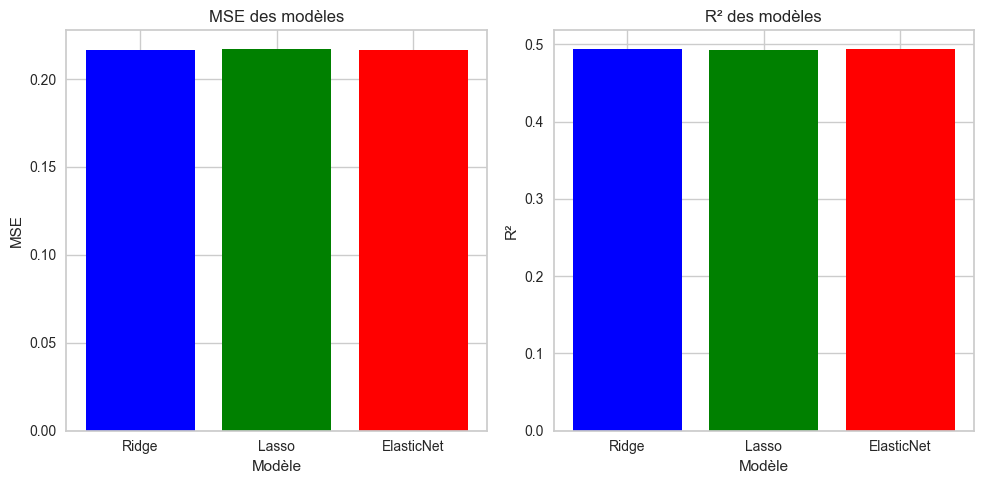

In [40]:
# Visualisation des résultats de MSE
mse_values = [mse_ridge, mse_lasso, mse_en]
r2_values = [r2_ridge, r2_lasso, r2_en]
model_names = ['Ridge', 'Lasso', 'ElasticNet']

plt.figure(figsize=(10, 5))

# MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color=['blue', 'green', 'red'])
plt.title('MSE des modèles')
plt.xlabel('Modèle')
plt.ylabel('MSE')

# R²
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color=['blue', 'green', 'red'])
plt.title('R² des modèles')
plt.xlabel('Modèle')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


Les coefficients indiquent que les variables **height_right**, **margin_up**, **height_left**, **diagonal**, et **length** ont des effets variés sur la variable cible. Toutefois, les différences entre les modèles sont relativement petites, ce qui montre que les modèles Ridge, Lasso, et ElasticNet sont relativement cohérents dans la façon dont ils attribuent des poids aux variables. Ces résultats peuvent être utilisés pour interpréter l'impact de ces variables sur la prédiction de la variable cible dans le cadre de votre analyse.


# Conclusion

Le projet s'inscrit dans le cadre de l'application des méthodes de **Machine Learning** pour la prédiction de variables en utilisant des techniques de régression. Trois modèles ont été étudiés et comparés : **Ridge**, **Lasso** et **ElasticNet**. L'objectif principal était d'optimiser ces modèles en ajustant leurs hyperparamètres, notamment le paramètre **alpha** pour chaque modèle, afin d'améliorer leur performance en termes de précision.
